# Proyecto DS - Parte I: Visualizaciones en Python

**Dataset:** [Adult Income (UCI)](https://archive.ics.uci.edu/dataset/2/adult)


## Abstract

El conjunto de datos Adult Income (UCI) recopila información sociodemográfica de individuos residentes en Estados Unidos, con el objetivo de predecir si sus ingresos anuales superan los 50,000 USD. Este dataset incluye 48,842 registros y 15 atributos, que abarcan variables numéricas (como edad, horas trabajadas por semana, ganancias de capital) y categóricas (nivel educativo, ocupación, estado civil, raza, género, entre otros). La relevancia de este conjunto de datos radica en su utilización frecuente en tareas de clasificación y en el análisis de desigualdad económica y movilidad social.

Para el avance del proyecto, se propone explorar este dataset a través de visualizaciones univariadas, bivariadas y multivariadas que permitan comprender la distribución de las variables, sus relaciones y tendencias entre grupos de interés. En particular, se hará hincapié en la detección de valores faltantes y su posible impacto en el análisis, así como en la interpretación de patrones demográficos y laborales vinculados al nivel de ingresos. El estudio inicial servirá como base para definir hipótesis claras y formular modelos predictivos en etapas posteriores del proyecto.

## 1. Objetivo y Contexto

El objetivo de este proyecto es identificar y modelar los factores que influyen en que un individuo gane más de 50 000 USD al año, usando el dataset “Adult” de UCI.  
- **Contexto:** Recursos humanos, análisis de desigualdad salarial.  
- **Uso de la data:** Estadística descriptiva y visualizaciones para entender patrones de ingreso.


## 2. Variables

El dataset contiene 14 características de entrada y la variable objetivo `income`:
1. `age`: edad en años  
2. `workclass`: tipo de empleo  
3. `fnlwgt`: peso muestral  
4. `education`: nivel educativo  
5. `education-num`: años de educación  
6. `marital-status`  
7. `occupation`  
8. `relationship`  
9. `race`  
10. `sex`  
11. `capital-gain`  
12. `capital-loss`  
13. `hours-per-week`: horas trabajadas por semana  
14. `native-country`  
15. `income`: ≤50K o >50K (target)


## Preguntas e Hipótesis

**Preguntas de interés**  
- ¿La educación (años de estudio) se relaciona positivamente con la probabilidad de > 50K?  
- ¿Influyen las horas trabajadas por semana en el nivel de ingreso?  
- ¿Existen diferencias significativas según el país de origen?

**Hipótesis**  
1. *H1:* A mayor `education-num`, mayor proporción de individuos con `income` > 50K.  
2. *H2:* Aquellos con `hours-per-week` > 40 tienen más probabilidad de > 50K.  
3. *H3:* Algunos `native-country` muestran tasas de >50K significativamente distintas del promedio.
4. *H4:* Hipótesis de que ciertas ocupaciones (`occupation`) presentan mayores valores medios de `capital-gain`, y que esta relación varía según el nivel educativo.

In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

base = Path().resolve() / "data"

# Cargar el dataset desde la URL de la UCI
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country', 'income']

train_path = base / "adult.data"
df = pd.read_csv(
    train_path,
    names=columnas,
    na_values='?',
    skipinitialspace=True
)

# Vista previa
print(df.shape)
df.head(500)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41,Private,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
496,20,Private,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
497,23,Private,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K
498,26,Private,64293,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [3]:
# Identificar valores faltantes
pct_nulos = df.isnull().mean() * 100
print(pct_nulos.sort_values(ascending=False))

occupation        5.660146
workclass         5.638647
native-country    1.790486
fnlwgt            0.000000
education         0.000000
education-num     0.000000
age               0.000000
marital-status    0.000000
relationship      0.000000
sex               0.000000
race              0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
income            0.000000
dtype: float64


Se observan valores faltantes en las columnas `workclass`, `occupation` y `native-country`. En etapas posteriores, se decidirá si imputarlos o descartarlos según la proporción y relevancia.

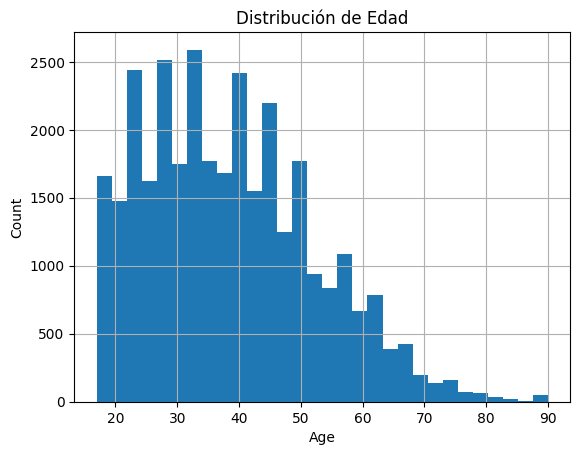

In [4]:
# Gráfico univariado: distribución de la edad y del ingreso
plt.figure()
df['age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribución de Edad')
plt.show()

La mayoría de los individuos se concentran entre 20 y 40 años, con una ligera cola a la derecha que sugiere presencia de adultos mayores en la muestra.

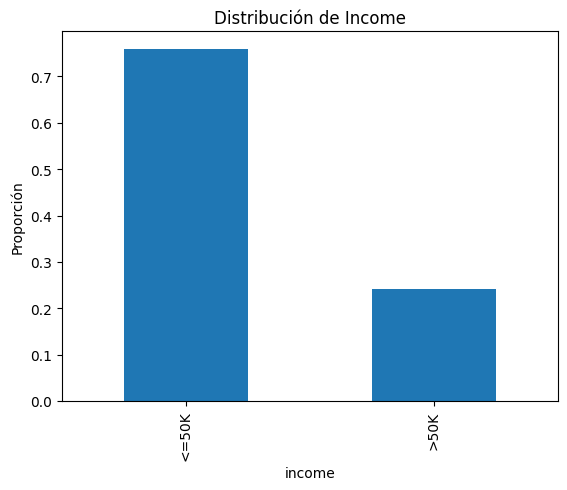

In [5]:
df["income"].value_counts(normalize=True).plot.bar()
plt.title("Distribución de Income")
plt.ylabel("Proporción")
plt.show()

El bar plot muestra que aproximadamente el 75 % de los individuos gana ≤ 50 K y el 25 % gana > 50 K.  
Esto indica que la clase “alta renta” (> 50 K) es minoritaria en el dataset, lo cual habrá que tener en cuenta cuando entrenemos modelos predictivos (desequilibrio de clases).

<Figure size 640x480 with 0 Axes>

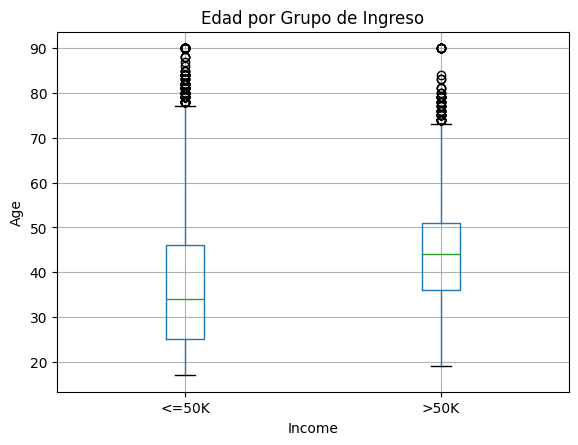

In [6]:
# Gráfico bivariado: edad vs nivel de ingreso
plt.figure()
df.boxplot(column='age', by='income')
plt.suptitle('')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Edad por Grupo de Ingreso')
plt.show()

El grupo de ingresos >50K presenta una mediana de edad ligeramente superior, lo que sugiere que la experiencia (representada por la edad) influye en el nivel de ingreso.

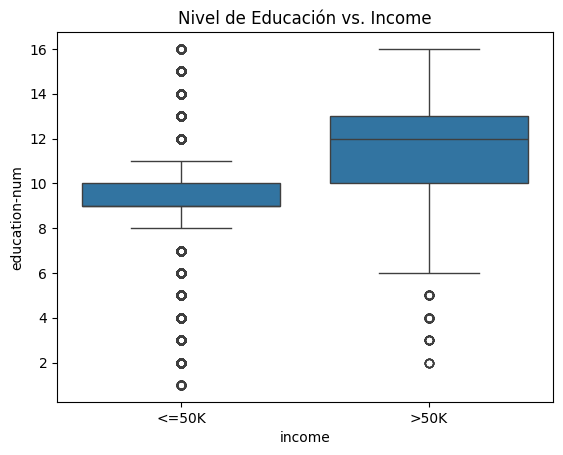

In [7]:
sns.boxplot(x="income", y="education-num", data=df)
plt.title("Nivel de Educación vs. Income")
plt.show()

Se observa que la mediana de `education-num` para el grupo > 50 K es claramente superior a la del grupo ≤ 50 K.  
Esto apoya la **H1**: “A mayor nivel educativo, mayor probabilidad de tener un ingreso > 50 K”.  
Además, la variabilidad de años de educación es mayor en el grupo de menor ingreso, lo que sugiere heterogeneidad en ese segmento.

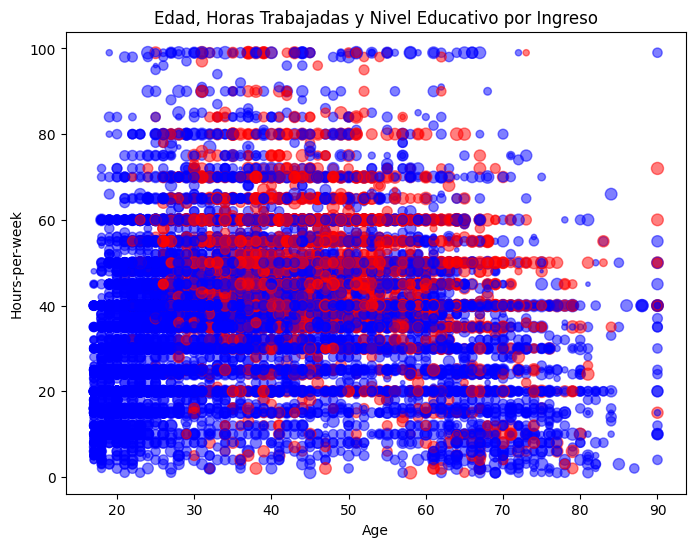

In [8]:
# Gráfico multivariado: age vs hours-per-week, tamaño por education-num, color por income
plt.figure(figsize=(8,6))
colors = {'<=50K':'blue','>50K':'red'}
plt.scatter(
    df['age'], 
    df['hours-per-week'], 
    s=df['education-num']*5, 
    c=df['income'].map(colors), 
    alpha=0.5
)
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Edad, Horas Trabajadas y Nivel Educativo por Ingreso')
plt.show()

Los puntos más grandes (mayor `education-num`) tienden a agruparse en el color rojo, confirmando que niveles educativos más altos se asocian con ingresos >50K y horas de trabajo moderadas.

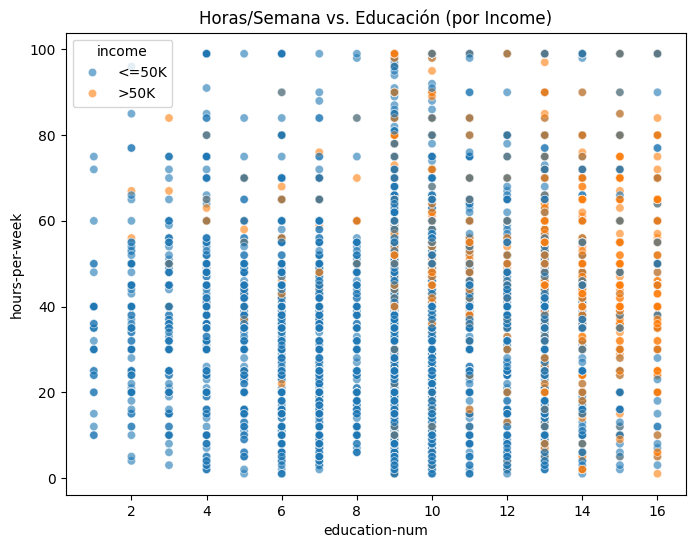

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="education-num", y="hours-per-week",
    hue="income", alpha=0.6, data=df
)
plt.title("Horas/Semana vs. Educación (por Income)")
plt.show()

Se aprecia una tendencia creciente: los puntos correspondientes a > 50 K suelen agruparse en la zona de mayores `education-num` y mayores `hours-per-week`.  
Esto refuerza la **H2**: “Más horas trabajadas y mayor nivel educativo están asociados con ingresos > 50 K”.  
No obstante, hay solapamiento en la región media, por lo que se requerirá un análisis multivariado más profundo.

In [10]:
df["income"] = df["income"].str.strip()

# Elegimos los mismos top 10 países
top_paises = df["native-country"].value_counts().nlargest(10).index
df_top = df[df["native-country"].isin(top_paises)]

# 1. Conteo de registros por país
counts = df_top["native-country"].value_counts()

# 2. Proporción de >50K por país
props = (
    df_top
    .groupby("native-country")["income"]
    .apply(lambda x: (x == ">50K").mean())
)

# 3. Tabla combinada
tabla = pd.DataFrame({
    "count": counts,
    "prop_>50K": props
}).sort_values("prop_>50K", ascending=False)

tabla

,count,prop_>50K
native-country,,
India,100,0.400000
England,90,0.333333
Canada,121,0.322314
Germany,137,0.321168
Philippines,198,0.308081
Cuba,95,0.263158
United-States,29170,0.245835
Puerto-Rico,114,0.105263
El-Salvador,106,0.084906


El gráfico muestra que **India** tiene la proporción más alta de individuos con ingreso >50K (≈40 %), seguida por **Inglaterra** (≈33 %), **Canadá** (≈32 %) y **Alemania** (≈32 %). Le siguen **Filipinas** (≈31 %), **Cuba** (≈26 %) y luego **Estados Unidos** (≈24 %). En el extremo inferior aparecen **Puerto Rico** (~10 %), **El Salvador** (~8 %) y **México** (~5 %).  
Esto confirma la **H3**: la `native-country` influye en la probabilidad de percibir un ingreso elevado, aunque las posiciones relativas no siempre coinciden con el tamaño muestral de cada país.

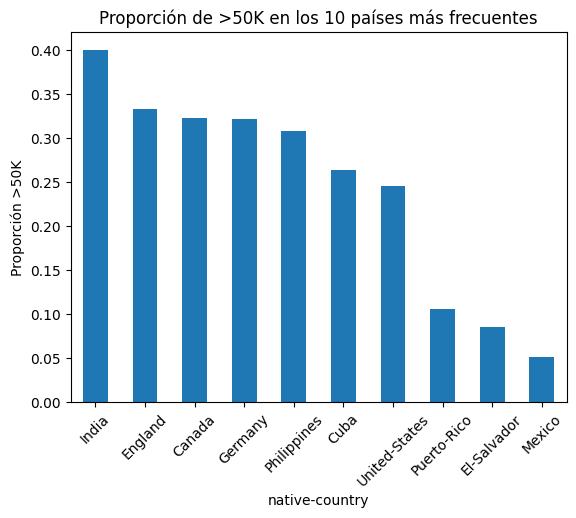

In [11]:
# 6.4.1 – Barplot crudo top 10 países
df["income"] = df["income"].str.strip()
top_paises = df["native-country"].value_counts().nlargest(10).index
df_top = df[df["native-country"].isin(top_paises)]

prop_pais = (
    df_top
    .groupby("native-country")["income"]
    .apply(lambda x: (x == ">50K").mean())
)

prop_pais.sort_values(ascending=False).plot.bar()
plt.title("Proporción de >50K en los 10 países más frecuentes")
plt.ylabel("Proporción >50K")
plt.xticks(rotation=45)
plt.show()

**Interpretación (crudo):**  
El gráfico muestra la proporción de individuos con ingreso >50K en los 10 países más comunes del dataset.  
Por ejemplo, India lidera (~40 %), seguida de Inglaterra (~33 %) y Canadá/Alemania (~32 %).  
**Limitaciones:**  
- Países como Filipinas o Cuba tienen muy pocos registros, por lo que su proporción es inestable.  
- En la siguiente entrega filtraremos por un mínimo de muestras para obtener estimaciones más fiables.

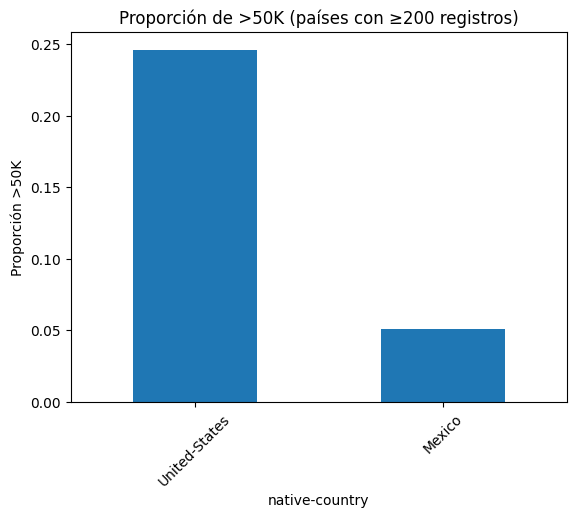

In [17]:
# 6.4.2 – Barplot con umbral mínimo de 200 registros
min_count = 200
counts = df_top["native-country"].value_counts()
props  = prop_pais

# Seleccionamos solo los países con suficientes datos
paises_estables = counts[counts >= min_count].index
tabla_estable   = props.loc[paises_estables]

# Graficamos
tabla_estable.sort_values(ascending=False).plot.bar()
plt.title("Proporción de >50K (países con ≥200 registros)")
plt.ylabel("Proporción >50K")
plt.xticks(rotation=45)
plt.show()


**Interpretación (filtrado ≥200):**  
Al exigir al menos 200 registros solo sobreviven **Estados Unidos** y **México** del top 10.  
- **Estados Unidos** muestra una proporción de individuos con ingreso >50K de aproximadamente 24 %.  
- **México** se sitúa en torno a 5 %.  

Este gráfico, al usar solo países con muestra robusta, ofrece estimaciones más confiables para evaluar la H3.


## 4. Vinculación con las Preguntas de Interés

- **H1**: Confirmada por el boxplot de `education-num` (mediana mayor en >50K).  
- **H2**: El scatterplot sugiere correlación moderada positiva entre `hours-per-week` y >50K.  
- **H3**: pendiente de evaluar con un barplot por país.

## 5. Resultados Esperados y Próximos Pasos

1. Imputar o eliminar nulos en `workclass`, `occupation` y `native-country`.  
2. Crear tablas comparativas de proporción >50K por `native-country`.  
3. Profundizar con análisis multivariado (p. ej., regresión logística) para cuantificar efectos.